In [240]:
# Importing needed libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure plots show inside the notebook
%matplotlib inline

In [241]:
#df is the interest rate dataset
df = pd.read_csv("/Users/junaidjaveed/Desktop/Project_1/pr_f2.csv")

In [242]:
df.head()

,Effective Date\n,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
0,02-07-2025,6.50,6.25,-,6.00,6.50,-,-
1,12-28-2024,-,-,-,-,-,4,-
2,12-14-2024,-,-,-,-,-,4.25,-
3,02-08-2023,6.75,6.50,-,6.25,6.75,-,-
4,12-07-2022,6.50,6.25,-,6.00,6.50,-,-


In [243]:
print(df["Effective Date\n"])

0      02-07-2025
1      12-28-2024
2      12-14-2024
3      02-08-2023
4      12-07-2022
          ...    
238    03-02-1968
239    02-17-1965
240    09-26-1964
241    09-16-1964
242    01-03-1963
Name: Effective Date\n, Length: 243, dtype: object


In [244]:
df.columns = df.columns.str.strip() # Clean column names of any spaces.

In [245]:
df.head()

,Effective Date,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
0,02-07-2025,6.50,6.25,-,6.00,6.50,-,-
1,12-28-2024,-,-,-,-,-,4,-
2,12-14-2024,-,-,-,-,-,4.25,-
3,02-08-2023,6.75,6.50,-,6.25,6.75,-,-
4,12-07-2022,6.50,6.25,-,6.00,6.50,-,-


In [246]:
print(df["Effective Date"])

0      02-07-2025
1      12-28-2024
2      12-14-2024
3      02-08-2023
4      12-07-2022
          ...    
238    03-02-1968
239    02-17-1965
240    09-26-1964
241    09-16-1964
242    01-03-1963
Name: Effective Date, Length: 243, dtype: object


In [247]:
#Convert 'Effective Date' column to datetime format
df["Effective Date"] = pd.to_datetime(df["Effective Date"])

In [248]:
print(df["Effective Date"].dtype)

datetime64[ns]


In [249]:
df.index = df["Effective Date"] # Make column "Effective Date index col

In [250]:
print(df.index.dtype)

datetime64[ns]


In [251]:
print(df.index)

DatetimeIndex(['2025-02-07', '2024-12-28', '2024-12-14', '2023-02-08', '2022-12-07', '2022-09-30', '2022-08-05', '2022-06-08', '2022-05-21', '2022-05-04',
               ...
               '1972-08-04', '1971-01-09', '1970-08-28', '1970-04-24', '1970-02-05', '1968-03-02', '1965-02-17', '1964-09-26', '1964-09-16', '1963-01-03'], dtype='datetime64[ns]', name='Effective Date', length=243, freq=None)


In [252]:
df = df.sort_index() # Sort dataframe based on index column 'Effective Date'

In [253]:
df.head()

,Effective Date,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
Effective Date,,,,,,,,
1963-01-03,1963-01-03,4.50,-,-,-,-,-,-
1964-09-16,1964-09-16,-,-,-,-,-,-,25.00
1964-09-26,1964-09-26,5.00,-,-,-,-,-,-
1965-02-17,1965-02-17,6.00,-,-,-,-,-,-
1968-03-02,1968-03-02,5.00,-,-,-,-,-,-


In [254]:
columns_to_replace = ["Bank Rate", "Repo", "Reverse Repo", "Standing Deposit Facility (SDF) Rate",
                      "Marginal Standing Facility (MSF) Rate","Cash Reserve Ratio (CRR)",
                      "Statutory Liquidity Ratio (SLR)"] 
# columns in which '-' means no change in value' need to fill '-' with previous
#value that variable had

In [255]:
# replacing '-' in "columns_to_replace columns" to NaN and forward fill as "-" indicates no change from previous values
df = df.replace("-", pd.NA)
df = df.ffill()

In [256]:
df.head(-20)

,Effective Date,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
Effective Date,,,,,,,,
1963-01-03,1963-01-03,4.50,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1964-09-16,1964-09-16,4.50,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
1964-09-26,1964-09-26,5.00,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
1965-02-17,1965-02-17,6.00,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
1968-03-02,1968-03-02,5.00,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
...,...,...,...,...,...,...,...,...
2019-04-13,2019-04-13,6.25,6.00,5.75,<NA>,6.25,4,19.00
2019-06-06,2019-06-06,6.00,5.75,5.50,<NA>,6.00,4,19.00
2019-07-06,2019-07-06,6.00,5.75,5.50,<NA>,6.00,4,18.75


In [257]:
df.head(10)

,Effective Date,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
Effective Date,,,,,,,,
1963-01-03,1963-01-03,4.50,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1964-09-16,1964-09-16,4.50,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
1964-09-26,1964-09-26,5.00,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
1965-02-17,1965-02-17,6.00,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
1968-03-02,1968-03-02,5.00,<NA>,<NA>,<NA>,<NA>,<NA>,25.00
1970-02-05,1970-02-05,5.00,<NA>,<NA>,<NA>,<NA>,<NA>,26.00
1970-04-24,1970-04-24,5.00,<NA>,<NA>,<NA>,<NA>,<NA>,27.00
1970-08-28,1970-08-28,5.00,<NA>,<NA>,<NA>,<NA>,<NA>,28.00
1971-01-09,1971-01-09,6.00,<NA>,<NA>,<NA>,<NA>,<NA>,28.00


In [258]:
df.head()
df.isnull().sum()

Effective Date                             0
Bank Rate                                  0
Repo                                     102
Reverse Repo                             102
Standing Deposit Facility (SDF) Rate     232
Marginal Standing Facility (MSF) Rate    175
Cash Reserve Ratio (CRR)                  12
Statutory Liquidity Ratio (SLR)            1
dtype: int64

In [259]:
# Loading Bank nifty dataset source: https://www.niftyindices.com/reports/historical-data
df_nb = pd.read_csv("/Users/junaidjaveed/Desktop/Project_1/BankNifty.csv")

In [260]:
print(df_nb["Date"].unique()) #Shows all the different date formats in Date column

['13 Mar 2025' '12 Mar 2025' '11 Mar 2025' ... '04 Jan 2000' '03 Jan 2000'
 '01 Jan 2000']


In [261]:
#Convert to Datetime format to YYYY-MM-DD from dd mm YYYY
df_nb["Date"] = pd.to_datetime(df_nb["Date"], format = "%d %b %Y")

In [262]:
print(df_nb["Date"].dtype)

datetime64[ns]


In [263]:
df_nb.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY BANK,2025-03-13,48219.15,48352.45,48006.1,48060.40
1,NIFTY BANK,2025-03-12,47894.4,48222.15,47844.95,48056.65
2,NIFTY BANK,2025-03-11,47874.8,48029.05,47702.9,47853.95
3,NIFTY BANK,2025-03-10,48312,48599.15,48124.65,48216.80
4,NIFTY BANK,2025-03-07,48463.8,48709.05,48359.35,48497.50


In [264]:
df_nb.index = df_nb["Date"]

In [265]:
df_nb = df_nb.sort_index()

In [266]:
df_nb.head(10)

,Index Name,Date,Open,High,Low,Close
Date,,,,,,
2000-01-01,NIFTY BANK,2000-01-01,-,-,-,1000.00
2000-01-03,NIFTY BANK,2000-01-03,-,-,-,1054.81
2000-01-04,NIFTY BANK,2000-01-04,-,-,-,1092.08
2000-01-05,NIFTY BANK,2000-01-05,-,-,-,1055.99
2000-01-06,NIFTY BANK,2000-01-06,-,-,-,1086.67
2000-01-07,NIFTY BANK,2000-01-07,-,-,-,1126.99
2000-01-10,NIFTY BANK,2000-01-10,-,-,-,1088.97
2000-01-11,NIFTY BANK,2000-01-11,-,-,-,1033.55
2000-01-12,NIFTY BANK,2000-01-12,-,-,-,1036.63


In [267]:
#Find earliest date since when nifty bank prices were recorded.
earliest_date = df_nb["Date"].min()

In [268]:
# Drop rows from interest table which are older than earliest date, Since no data is available for those dates in nifty bank table
df = df[df["Effective Date"] >= earliest_date]

In [269]:
df.reset_index(drop=True, inplace=True) # reset index

In [270]:
df_nb.reset_index(drop=True, inplace=True) #reset index

In [271]:
#Convert data formats to numeric for following columns
col_to_convert = ["Open", "High", "Low", "Bank Rate", "Repo", "Reverse Repo", "Standing Deposit Facility (SDF) Rate", 
                  "Marginal Standing Facility (MSF) Rate", "Cash Reserve Ratio (CRR)",
                 "Statutory Liquidity Ratio (SLR)"]
for col in col_to_convert:
    df_merged[col] = pd.to_numeric(df_merged[col], errors= 'coerce')

In [272]:
#Check common date in both tables
common_dates = set(df_nb['Date']).intersection(set(df['Effective Date']))
print(len(common_dates))


83


In [273]:
df_nb['Date'] = pd.to_datetime(df_nb['Date'], format='%Y-%m-%d', errors='coerce')
df['Effective Date'] = pd.to_datetime(df['Effective Date'], format='%Y-%m-%d', errors='coerce')

In [274]:
print(df_nb['Date'].isna().sum(), df['Effective Date'].isna().sum())

0 0


In [275]:
df.head()

,Effective Date,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
0,2000-04-02,7.00,<NA>,<NA>,<NA>,<NA>,9,25.00
1,2000-04-08,7.00,<NA>,<NA>,<NA>,<NA>,8.5,25.00
2,2000-04-22,7.00,<NA>,<NA>,<NA>,<NA>,8,25.00
3,2000-07-22,8.00,<NA>,<NA>,<NA>,<NA>,8,25.00
4,2000-07-29,8.00,<NA>,<NA>,<NA>,<NA>,8.25,25.00


In [276]:
df.head()
df_nb.head

<bound method NDFrame.head of       Index Name       Date      Open      High       Low     Close
0     NIFTY BANK 2000-01-01         -         -         -   1000.00
1     NIFTY BANK 2000-01-03         -         -         -   1054.81
2     NIFTY BANK 2000-01-04         -         -         -   1092.08
3     NIFTY BANK 2000-01-05         -         -         -   1055.99
4     NIFTY BANK 2000-01-06         -         -         -   1086.67
...          ...        ...       ...       ...       ...       ...
6265  NIFTY BANK 2025-03-07   48463.8  48709.05  48359.35  48497.50
6266  NIFTY BANK 2025-03-10     48312  48599.15  48124.65  48216.80
6267  NIFTY BANK 2025-03-11   47874.8  48029.05   47702.9  47853.95
6268  NIFTY BANK 2025-03-12   47894.4  48222.15  47844.95  48056.65
6269  NIFTY BANK 2025-03-13  48219.15  48352.45   48006.1  48060.40

[6270 rows x 6 columns]>

In [277]:
# Drop "Index Name" column not needed
df_nb.drop(columns=["Index Name"], inplace = True)

In [278]:
#Merge two data sets, asof check for mismatches and assigns closest date available base on condition, here: "days=3"
df_merged = pd.merge_asof(df_nb, df, left_on="Date", right_on="Effective Date", tolerance=pd.Timedelta(days=3))

In [279]:
df["Effective Date"].notna().sum()

np.int64(151)

In [280]:
df_merged.set_index("Date", inplace = True)

In [281]:
# Drop rows older than date "2000-03-31" for now because no data is available for those dates/Only Bank Nifty index value.
df_merged = df_merged[df_merged.index > "2000-03-31"]

In [282]:
df_merged.head()

,Open,High,Low,Close,Effective Date,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
Date,,,,,,,,,,,,
2000-04-03,-,-,-,1110.14,2000-04-02,7.00,<NA>,<NA>,<NA>,<NA>,9,25.00
2000-04-04,-,-,-,1026.65,2000-04-02,7.00,<NA>,<NA>,<NA>,<NA>,9,25.00
2000-04-05,-,-,-,1000.84,2000-04-02,7.00,<NA>,<NA>,<NA>,<NA>,9,25.00
2000-04-06,-,-,-,989.20,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-07,-,-,-,1048.75,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
# Sort data as per date
df_merged = df_merged.sort_index()

In [328]:
# Forward fill the columns whos value stayed same unless changed by RBI
df_merged = df_merged.ffill()
df_merged.head()

,index,Date,Open,High,Low,Close,Effective Date,Bank Rate,Repo,Reverse Repo,Standing Deposit Facility (SDF) Rate,Marginal Standing Facility (MSF) Rate,Cash Reserve Ratio (CRR),Statutory Liquidity Ratio (SLR)
0,0,2000-04-03,NaN,NaN,NaN,1110.14,2000-04-02,7.0,NaN,NaN,NaN,NaN,9.0,25.0
1,1,2000-04-04,NaN,NaN,NaN,1026.65,2000-04-02,7.0,NaN,NaN,NaN,NaN,9.0,25.0
2,2,2000-04-05,NaN,NaN,NaN,1000.84,2000-04-02,7.0,NaN,NaN,NaN,NaN,9.0,25.0
3,3,2000-04-06,NaN,NaN,NaN,989.20,2000-04-02,7.0,NaN,NaN,NaN,NaN,9.0,25.0
4,4,2000-04-07,NaN,NaN,NaN,1048.75,2000-04-02,7.0,NaN,NaN,NaN,NaN,9.0,25.0


In [356]:
df_merged.dtypes

level_0                                           int64
index                                             int64
Date                                     datetime64[ns]
Open                                            float64
High                                            float64
Low                                             float64
Close                                           float64
Effective Date                           datetime64[ns]
Bank Rate                                       float64
Repo                                            float64
Reverse Repo                                    float64
Standing Deposit Facility (SDF) Rate            float64
Marginal Standing Facility (MSF) Rate           float64
Cash Reserve Ratio (CRR)                        float64
Statutory Liquidity Ratio (SLR)                 float64
dtype: object

In [330]:
#Convert formating to numeric for numeric columns/Float64
for col in col_to_convert:
    df_merged[col] = pd.to_numeric(df_merged[col], errors = "coerce")

In [331]:
df_merged = df_merged.reset_index()

In [358]:
df_merged[["Repo","Close"]].describe()
df_merged["Repo"].isna().sum()

np.int64(268)

In [355]:
df_merged[["Repo","Close"]].describe()
df_merged["Repo"].isna().sum()

np.int64(268)

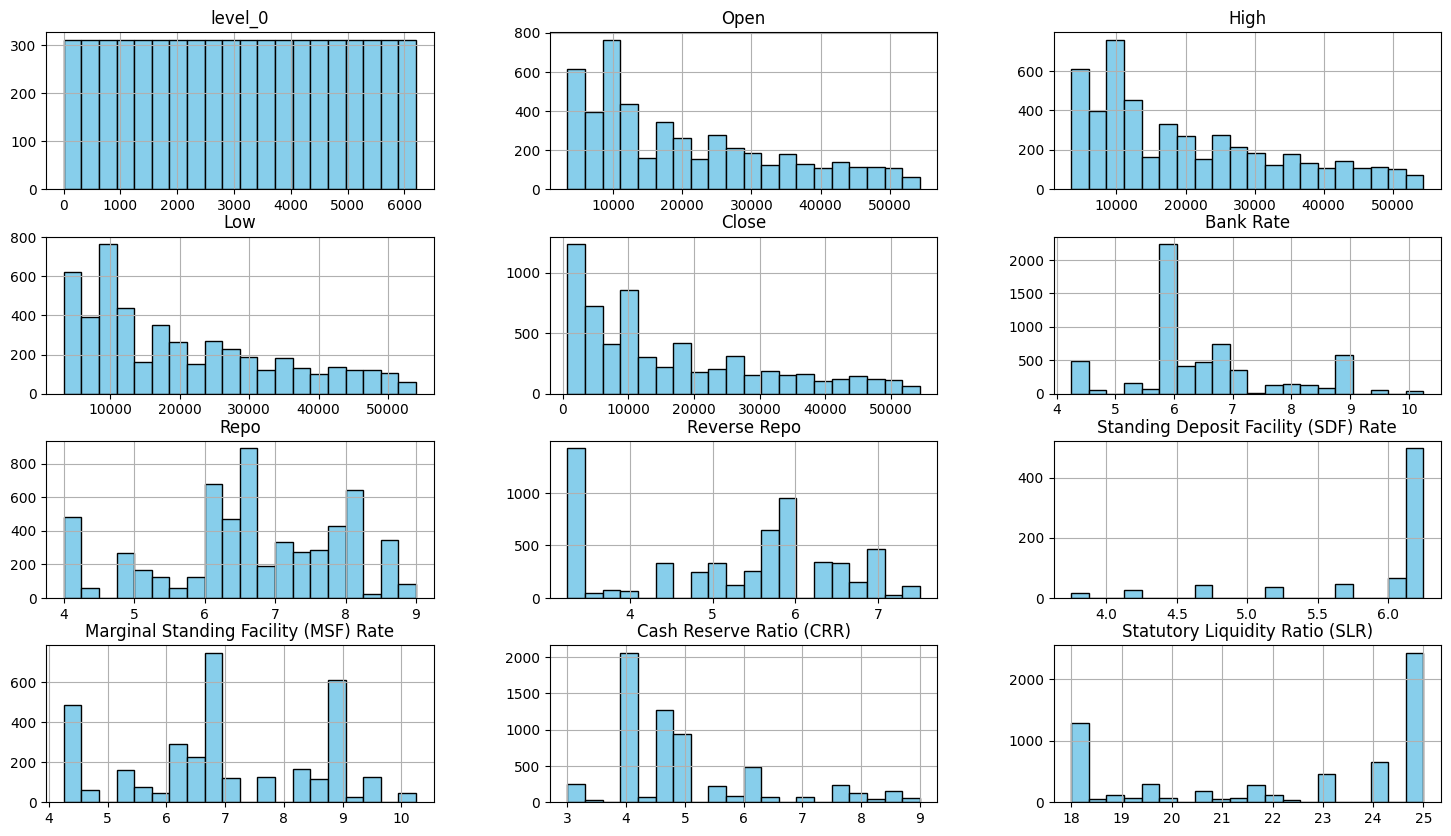

In [341]:
# Plot histograms to take a look at data
df_merged.drop(columns = ["index", "Date", "Effective Date"]).hist(bins = 20, figsize = (18,10), color = "skyblue", edgecolor = "Black")
plt.show()

In [510]:
# plt.scatter(df_merged["Repo"],df_merged["Close"], color = "dodgerblue", edgecolor = "black", alpha = 0.75)
# plt.xlabel("Repo rate")
# plt.ylabel("Bank close index")
# plt.show()

# Create DF Using Repo and Close only
df_rc = df_merged[["Date","Repo", "Close"]]

In [446]:
df_rc.dtypes

Date     datetime64[ns]
Repo            float64
Close           float64
dtype: object

In [511]:
# Filling Na values in Repo with mean of the series:
df_rc.loc[:, "Repo"] = df_rc["Repo"].fillna(df_rc["Repo"].mean())
print(df_rc.dtypes)
print(df_rc["Repo"].isna().sum())  # Count missing values
print(df_rc["Repo"].unique())  # Check unique values
# df_rc.loc[:, "Repo"] = pd.to_numeric(df_rc["Repo"], errors="coerce")

Date     datetime64[ns]
Repo            float64
Close           float64
dtype: object
0
[6.56011113 9.         8.75       8.5        8.         7.5
 7.1        7.         6.         6.25       6.5        6.75
 7.25       7.75       5.5        5.         4.75       5.25
 5.75       8.25       5.4        5.15       4.4        4.
 4.9        5.9       ]


In [512]:
df_rc.head()

,Date,Repo,Close
0,2000-04-03,6.560111,1110.14
1,2000-04-04,6.560111,1026.65
2,2000-04-05,6.560111,1000.84
3,2000-04-06,6.560111,989.20
4,2000-04-07,6.560111,1048.75


In [514]:
# Appy z-score manually:
df_rc.loc[:, "Repo"] = ((df_rc["Repo"]-df_rc["Repo"].mean())/df_rc["Repo"].std()).round(10)

In [515]:
df_rc.loc[:, "Close"] = (df_rc["Close"]-df_rc["Close"].mean())/df_rc["Close"].std()
# tmp = ((df_rc["Repo"]-df_rc["Repo"].mean())/df_rc["Repo"].std()).round(10)

In [516]:
#Check std and mean after standardization: Should be close to 1 and 0 respectively.
print("Repo Mean after standardization:", df_rc["Repo"].mean())  
print("Repo Standard deviation after standardization:", df_rc["Repo"].std())
print("Close Mean after standardization:", df_rc["Close"].mean())  
print("Close Standard deviation after standardization:", df_rc["Close"].std())

Repo Mean after standardization: -3.415532110760309e-12
Repo Standard deviation after standardization: 0.9999999999983467
Close Mean after standardization: -7.326362991565396e-17
Close Standard deviation after standardization: 1.0


In [523]:
# Bivariate correlation
corr_rc = df_rc[["Repo","Close"]].corr("pearson")

In [524]:
print(corr_rc)

           Repo     Close
Repo   1.000000 -0.428325
Close -0.428325  1.000000


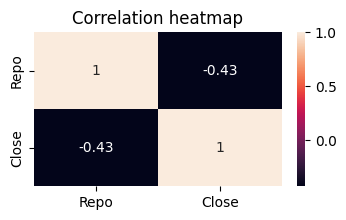

In [535]:
plt.figure(figsize = (4,2))
sns.heatmap(corr_rc, annot = True)
plt.title("Correlation heatmap")
plt.show()